# Percentage Point Function

*How sure are you that the mean of the population is in between a certain interval?*

<img src="../img/percent_point_function.png" width="80%">


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import norm


In [3]:
weather_data_beutenberg = pd.read_csv("../data/weather_data_beutenberg.csv")

In [4]:
weather_data_beutenberg.head()

,date_time,pressure_mbar,temperature_celsius,dew_point_celsius,relative_humidity_percent,vapor_pressure_actual_mbar,specific_humidity_g_per_kg,air_density_g_per_m_cubed,wind_velocity_m_per_s,wind_direction_degrees,rainfall_mm,location,season
0,01/01/2020 01:00,1008.44,0.34,-1.54,87.1,5.45,3.37,1281.84,0.63,188.00,0.0,Beutenberg,winter
1,01/01/2020 02:00,1008.32,-0.21,-1.78,89.1,5.36,3.31,1284.32,0.50,154.00,0.0,Beutenberg,winter
2,01/01/2020 03:00,1008.46,-0.05,-1.71,88.5,5.39,3.33,1283.73,0.46,46.51,0.0,Beutenberg,winter
3,01/01/2020 04:00,1008.00,-1.02,-2.31,90.9,5.15,3.19,1287.83,1.83,218.10,0.0,Beutenberg,winter
4,01/01/2020 05:00,1007.63,-1.84,-2.78,93.2,4.97,3.08,1291.32,1.53,226.90,0.0,Beutenberg,winter


array([[<Axes: title={'center': 'temperature_celsius'}>]], dtype=object)

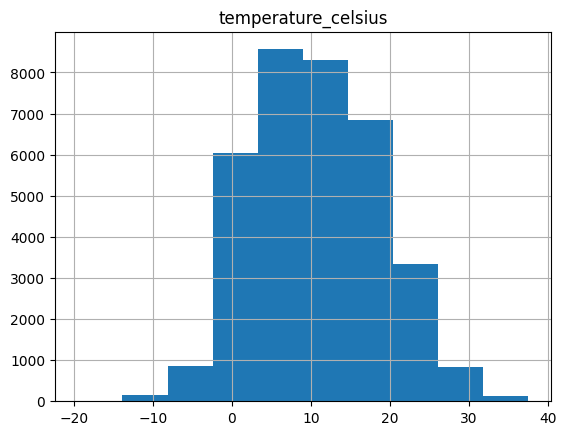

In [5]:
weather_data_beutenberg.hist("temperature_celsius") # visualise the distribution of the temperature

In [6]:
# since the data is normaly distributed, we can calculate the following
temperature_mean = weather_data_beutenberg['temperature_celsius'].mean()
temperature_std = weather_data_beutenberg['temperature_celsius'].std()

In [7]:
print(temperature_mean)

10.62906004105371


In [8]:
print(temperature_std)

7.944863612912738


In [9]:
sample_size = weather_data_beutenberg['temperature_celsius'].count()
print(sample_size)

35076


In [10]:
sem_beutenberg = temperature_std / np.sqrt(sample_size)
sem_beutenberg #sem = standard error of the mean

0.04242105015540785

In [11]:
alpha = 0.95
lower_quantile = (1 - alpha) / 2 #This is 0.025 (1 + 0.025)
upper_quantile = 1 - (1 - alpha) / 2 #This is 0.975 (100 - 0.025)

lower_bound = norm.ppf(lower_quantile, loc=temperature_mean, scale=sem_beutenberg)
upper_bound = norm.ppf(upper_quantile, loc=temperature_mean, scale=sem_beutenberg)

print("Lower Bound =", lower_bound)
print("Upper Bound =", upper_bound)

Lower Bound = 10.545916310562744
Upper Bound = 10.712203771544678


**In other words, you're 95% confident that the temperature will be between 10.54 and 10.71 (the true mean lies between these values).**